In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

# Age Distrubtion

In [5]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
def age_func(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_func)

C:\Python\PythonSoftware\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

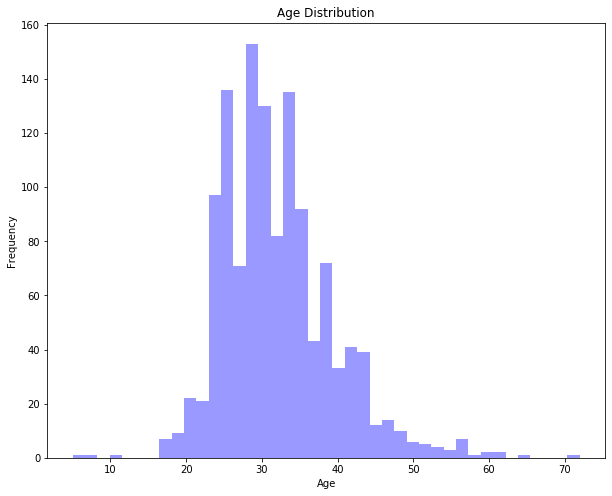

In [12]:
figure,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='blue')
plt.title('Age Distribution')
plt.ylabel('Frequency')

# Top 10 Country

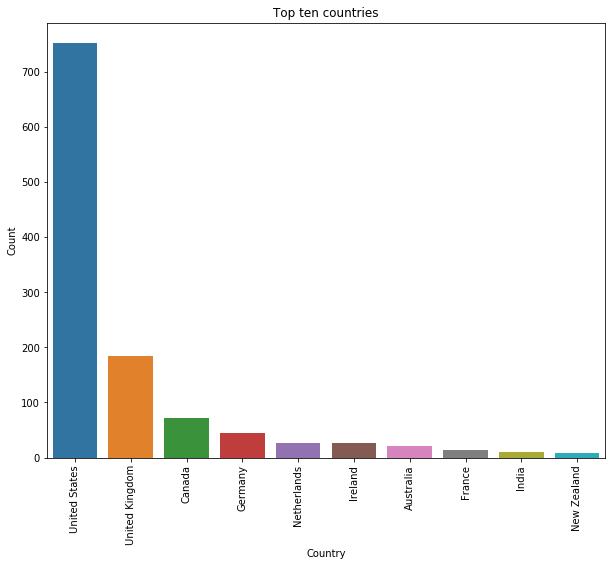

In [14]:
CountofCountry = Counter(df['Country'].dropna().tolist()).most_common(10)
IndexofCountry = [country[0] for country in CountofCountry]
CountryVal = [country[1] for country in CountofCountry]
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = IndexofCountry,y=CountryVal ,ax =ax)
plt.title('Top ten countries')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

# Treatment Distribution

C:\Python\PythonSoftware\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

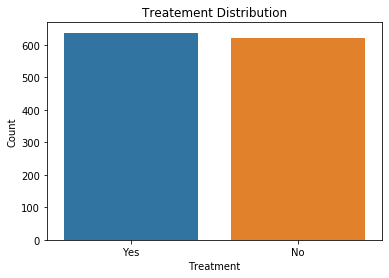

In [17]:
sns.countplot(df['treatment'])
plt.title('Treatement Distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')

# Age Group vs Treatment

Text(0, 0.5, 'Count')

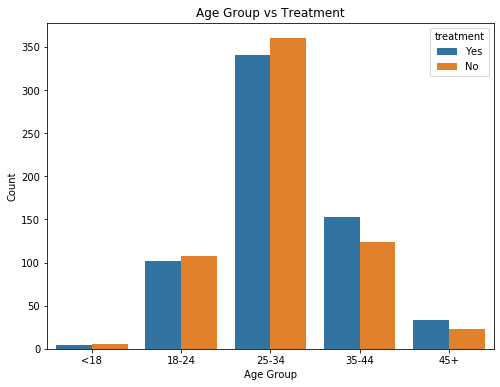

In [28]:
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])
figure,ax =plt.subplots(figsize=(10,8))
sns.countplot(data = df,x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Work Interfere Distribution

C:\Python\PythonSoftware\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

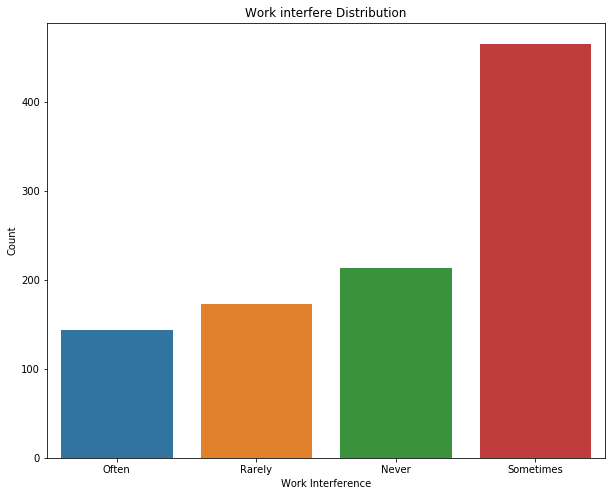

In [29]:
figure,ax  =plt.subplots(figsize=(10,8))
sns.countplot(df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.xlabel('Work Interference')
plt.ylabel('Count')

# Employee group ratio

Text(0.5,0,'employee group')

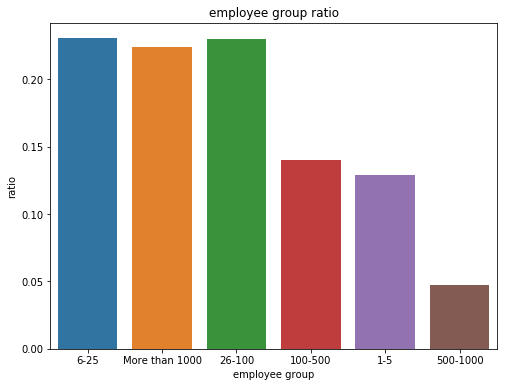

In [15]:
fig,ax = plt.subplots(figsize=(10,8))
total = df['no_employees'].dropna().shape[0] * 1.0
employee_count  = Counter(df['no_employees'].dropna().tolist())
for key,val in employee_count.items():
    employee_count[key] = employee_count[key] / total
employee_group = np.asarray(list(employee_count.keys()))
employee_val = np.asarray(list(employee_count.values()))
sns.barplot(x = employee_group , y = employee_val)
plt.title('employee group ratio')
plt.ylabel('ratio')
plt.xlabel('employee group')

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'no_employees', hue ='tech_company',ax=ax )
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs tech_company')

# remote work vs employee group

Text(0.5,1,'no_employee vs remote_work')

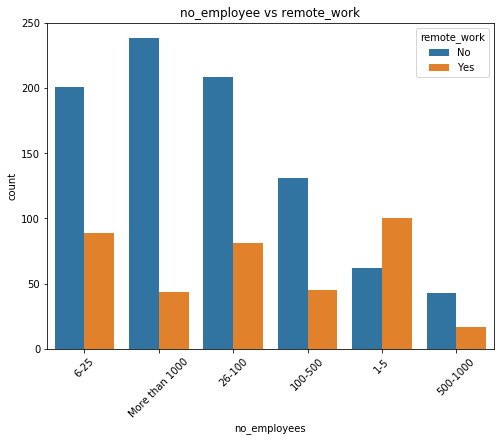

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'no_employees', hue ='remote_work',ax=ax )
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs remote_work')